# Foundations of AI/ML by IIIT-Hyderabad & Talent Sprint
# Lab07 Experiment 02

## Projecting data into a different space to remove non-linearity

In this experiment, we will visualize how data which is non-linearly separable in the given space might become linearly separable in a different space.

### 1. Visualizing the dataset
We will use a simple synthetic non-linear dataset - "non_linear.pkl" for this experiment. The dataset consists of 2 classes and a total of 2000 samples of 2 dimensions each.

(800, 2) (800,)


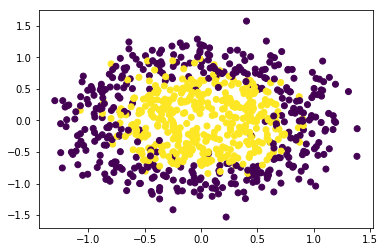

In [1]:
import pickle
import matplotlib.pyplot as plt
raw_data = pickle.load( open( "non_linear.pkl", "rb" ) )
data = raw_data[0]
labels = raw_data[1]
print(data.shape, labels.shape)

## Visualize the dataset
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

### 2. Projecting the data

#### Exercise 1: Project the data into a new space using a simple projection of $[x, y] - [x^2, y^2]$ and visualize the projected data.

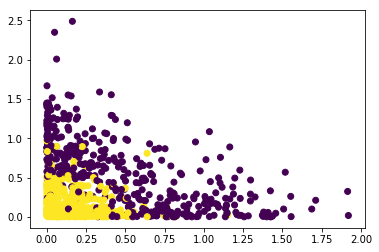

In [2]:
projected_data = ????????
## plot the projected data
???????
plt.show()

### 3. Train a linear classifier

Since the projected data looks linearly separable, let us train a linear classifier on this data, calculate its accuracy and visualize the boundary in the new space.

#### Exercise 2: Plot the decision boundary in the new space and calculate the accuracy

[-5.06284854]
[3.15145292]


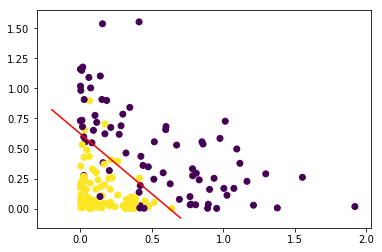

accuracy =  0.89375


In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression

## Split into train and test splits
## Note: Provided data is already shuffled
TrainTestRatio = 0.80
train_samples = (int)(projected_data.shape[0]*0.8)
train_data = projected_data[:train_samples,:]
train_labels = labels[:train_samples]
test_data = projected_data[train_samples:,:]
test_labels = labels[train_samples:]

## train the linear classifier (Logistic Regression in this case)
logreg = LogisticRegression()
logreg.fit(train_data,train_labels)
pred = logreg.predict(test_data)

## the decision boundary will be of form aX+b, we need to note the a and b learned
coeff = logreg.coef_
intercept = logreg.intercept_
## choosing an approprite range for x
xx = np.linspace(-0.2, 0.70, 50)
print(coeff[:, 0])
print(intercept)
yy = -(coeff[:, 0] * xx + intercept) / coeff[:,1]

## plot the decision boundary
plt.scatter(test_data[:,0], test_data[:,1], c=test_labels)
## plot the decision boundary
# ????????????????
plt.show()

## calculate the accuracy
# acc = ???????????????
print("accuracy = ", acc)


### 4. Visualize the boundary in the old space

This is a non-trivial step, therefore, to plot the decision boundary in the original space we will loop over the elements in the original space and find those elements whose projections are really close to the decision boundary obtained in the new space. Finally, we plot all these elements in the orginal space as the decision boundary.

#### Exercise 3: Find all such elements close to the decision boundary and visualize them in the original space

148


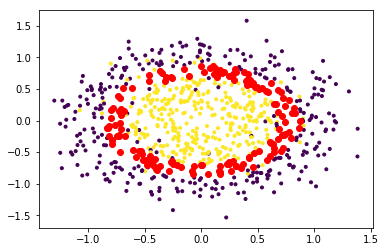

In [4]:
thresh = 0.1
def closeToLine(elem):
    ## find distance of point "elem" from the decision boundary using coeff and intercept
    dist = ??????????????
    if dist<thresh:
        return True
    else:
        return False

boundary = []
for elem in data:
    ## Your code here
    ???????????????
print("number of elements chosen = ", len(boundary))

## plot all the data in the original and the points close to decision boundary obtained above 
## Your code here
???????????
plt.show()

#### Exercise 3: Experiment with different projections to develop a better understanding of the problem via visualization.

## Solutions

### Exercise 1

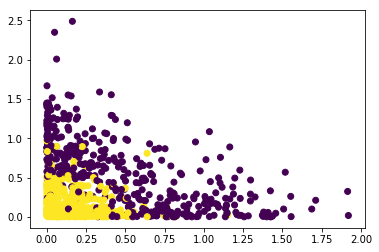

In [5]:
projected_data = data**2
plt.scatter(projected_data[:,0], projected_data[:,1], c=labels)
plt.show()

### Exercise 2

[-5.06284854]
[3.15145292]


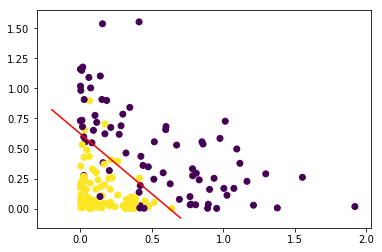

accuracy =  0.89375


In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression

## Split into train and test splits
## Note: Provided data is already shuffled
TrainTestRatio = 0.80
train_samples = (int)(projected_data.shape[0]*0.8)
train_data = projected_data[:train_samples,:]
train_labels = labels[:train_samples]
test_data = projected_data[train_samples:,:]
test_labels = labels[train_samples:]

## train the linear classifier (Logistic Regression in this case)
logreg = LogisticRegression()
logreg.fit(train_data,train_labels)
pred = logreg.predict(test_data)

## the decision boundary will be of form aX+b, we need to note the a and b learned
coeff = logreg.coef_
intercept = logreg.intercept_
## choosing an approprite range for x
xx = np.linspace(-0.2, 0.70, 50)
print(coeff[:, 0])
print(intercept)
yy = -(coeff[:, 0] * xx + intercept) / coeff[:,1]

## plot the decision boundary
plt.scatter(test_data[:,0], test_data[:,1], c=test_labels)
## plot the decision boundary
plt.plot(xx,yy,color='r')
plt.show()

## calculate the accuracy
acc = np.count_nonzero(pred==test_labels)/test_labels.shape[0]
print("accuracy = ", acc)


### Exercise 3

148


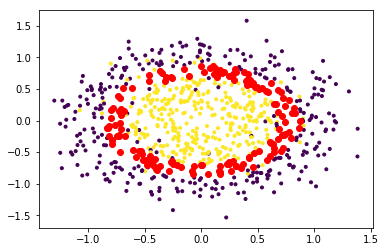

In [7]:
thresh = 0.1
def closeToLine(elem):
    dist = abs( (coeff[:,0]*elem[0]) + (coeff[:,1]*elem[1]) + intercept )*1.00/np.sqrt(coeff[:,0]**2 + coeff[:,1]**2)
    if dist<thresh:
        return True
    else:
        return False

boundary = []
for elem in data:
    if closeToLine(elem**2):
        boundary.append(elem)
print(len(boundary))

boundary = np.array(boundary)
plt.scatter(data[:,0], data[:,1], c=labels, marker='.')
plt.scatter(boundary[:,0], boundary[:,1], color='r', marker='o')
plt.show()